<a href="https://colab.research.google.com/github/max01218/-Pattern-recognition-HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 29ms/step - loss: 0.6170 - accuracy: 0.8129 - val_loss: 0.2844 - val_accuracy: 0.9112
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2475 - accuracy: 0.9232 - val_loss: 0.1717 - val_accuracy: 0.9488
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1597 - accuracy: 0.9508 - val_loss: 0.1831 - val_accuracy: 0.9438
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1153 - accuracy: 0.9638 - val_loss: 0.1580 - val_accuracy: 0.9507
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0842 - accuracy: 0.9739 - val_loss: 0.1456 - val_accuracy: 0.9571
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 0.1238 - val_accuracy: 0.9662
Epoch 7/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.1488 - val_accuracy: 0.957

**Plotting a validation accuracy comparison**

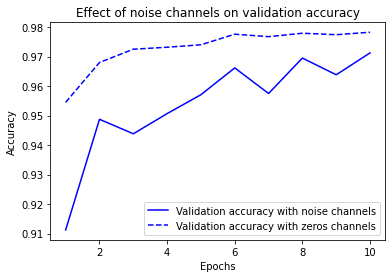

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 13ms/step - loss: 2.3160 - accuracy: 0.1038 - val_loss: 2.3042 - val_accuracy: 0.1080
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3001 - accuracy: 0.1170 - val_loss: 2.3150 - val_accuracy: 0.0980
Epoch 3/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2904 - accuracy: 0.1268 - val_loss: 2.3173 - val_accuracy: 0.0963
Epoch 4/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2764 - accuracy: 0.1410 - val_loss: 2.3266 - val_accuracy: 0.1042
Epoch 5/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2590 - accuracy: 0.1555 - val_loss: 2.3429 - val_accuracy: 0.1030
Epoch 6/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2389 - accuracy: 0.1675 - val_loss: 2.3636 - val_accuracy: 0.0943
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2146 - accuracy: 0.1857 - val_loss: 2.3678 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 869.8725 - accuracy: 0.4352 - val_loss: 2.7190 - val_accuracy: 0.3159
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 4.7686 - accuracy: 0.2831 - val_loss: 2.6717 - val_accuracy: 0.2388
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.9334 - accuracy: 0.2694 - val_loss: 2.4316 - val_accuracy: 0.2968
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 2.9198 - accuracy: 0.2713 - val_loss: 2.0274 - val_accuracy: 0.3257
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.6765 - accuracy: 0.2612 - val_loss: 2.2227 - val_accuracy: 0.3104
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.6782 - accuracy: 0.2864 - val_loss: 2.1730 - val_accuracy: 0.2689
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.7214 - accuracy: 0.2906 - val_loss: 2.6242 - val_accuracy: 0.23

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3378 - accuracy: 0.9142 - val_loss: 0.1546 - val_accuracy: 0.9608
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1441 - accuracy: 0.9631 - val_loss: 0.2173 - val_accuracy: 0.9521
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1202 - accuracy: 0.9726 - val_loss: 0.1784 - val_accuracy: 0.9688
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0980 - accuracy: 0.9780 - val_loss: 0.1730 - val_accuracy: 0.9724
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0884 - accuracy: 0.9815 - val_loss: 0.1998 - val_accuracy: 0.9728
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0796 - accuracy: 0.9837 - val_loss: 0.2193 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0805 - accuracy: 0.9860 - val_loss: 0.2480 - val_accuracy: 0.9723

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6615 - accuracy: 0.8392 - val_loss: 0.3583 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3501 - accuracy: 0.9036 - val_loss: 0.3076 - val_accuracy: 0.9132
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9125 - val_loss: 0.2900 - val_accuracy: 0.9179
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2988 - accuracy: 0.9167 - val_loss: 0.2810 - val_accuracy: 0.9220
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2891 - accuracy: 0.9194 - val_loss: 0.2740 - val_accuracy: 0.9242
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9208 - val_loss: 0.2714 - val_accuracy: 0.9241
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9226 - val_loss: 0.2696 - val_accuracy: 0.9261
Epoch 

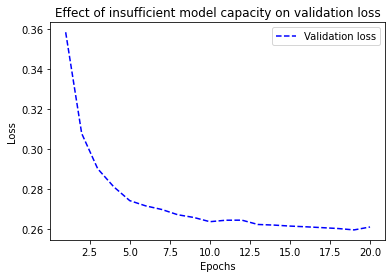

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 0.3628 - accuracy: 0.8974 - val_loss: 0.1972 - val_accuracy: 0.9412
Epoch 2/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1678 - accuracy: 0.9507 - val_loss: 0.1439 - val_accuracy: 0.9591
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.1205 - val_accuracy: 0.9632
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.1067 - val_accuracy: 0.9677
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.1149 - val_accuracy: 0.9658
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0924 - val_accuracy: 0.9743
Epoc

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5190 - accuracy: 0.7805 - val_loss: 0.3950 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3041 - accuracy: 0.9003 - val_loss: 0.2998 - val_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2184 - accuracy: 0.9303 - val_loss: 0.3005 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1741 - accuracy: 0.9442 - val_loss: 0.2787 - val_accuracy: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1428 - accuracy: 0.9541 - val_loss: 0.2915 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.3000 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0966 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6317 - accuracy: 0.7651 - val_loss: 0.5719 - val_accuracy: 0.8467
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5201 - accuracy: 0.8729 - val_loss: 0.4866 - val_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4319 - accuracy: 0.8923 - val_loss: 0.4160 - val_accuracy: 0.8746
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3599 - accuracy: 0.9037 - val_loss: 0.3645 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3031 - accuracy: 0.9154 - val_loss: 0.3271 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2594 - accuracy: 0.9263 - val_loss: 0.3025 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2254 - accuracy: 0.9333 - val_loss: 0.2896 - val_accuracy: 0.8899
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 280ms/step - loss: 0.5277 - accuracy: 0.7413 - val_loss: 0.3165 - val_accuracy: 0.8788
Epoch 2/20
30/30 [==============================] - 8s 265ms/step - loss: 0.2443 - accuracy: 0.9059 - val_loss: 0.2694 - val_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 9s 287ms/step - loss: 0.1337 - accuracy: 0.9490 - val_loss: 0.4503 - val_accuracy: 0.8542
Epoch 4/20
30/30 [==============================] - 8s 283ms/step - loss: 0.1076 - accuracy: 0.9657 - val_loss: 0.3223 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 8s 275ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.4645 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 8s 278ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.5967 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 8s 265ms/step - loss: 0.2333 - accuracy: 0.9801 - val_loss: 0.5148 - val_accuracy: 0.8847
Epoch 

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.6002 - accuracy: 0.7821 - val_loss: 0.4768 - val_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4062 - accuracy: 0.8955 - val_loss: 0.4093 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3396 - accuracy: 0.9143 - val_loss: 0.3707 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3049 - accuracy: 0.9254 - val_loss: 0.3771 - val_accuracy: 0.8786
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2837 - accuracy: 0.9305 - val_loss: 0.3612 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2682 - accuracy: 0.9356 - val_loss: 0.3665 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2576 - accuracy: 0.9399 - val_loss: 0.4307 - val_accuracy: 0.8568
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 46ms/step - loss: 0.6602 - accuracy: 0.5887 - val_loss: 0.5795 - val_accuracy: 0.7845
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5551 - accuracy: 0.7243 - val_loss: 0.4571 - val_accuracy: 0.8625
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4683 - accuracy: 0.7905 - val_loss: 0.3849 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4051 - accuracy: 0.8400 - val_loss: 0.3517 - val_accuracy: 0.8764
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3579 - accuracy: 0.8703 - val_loss: 0.3317 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3199 - accuracy: 0.8995 - val_loss: 0.3171 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2863 - accuracy: 0.9171 - val_loss: 0.2924 - val_accuracy: 0.8896
Epoch 8/20
30

## Summary